# ETL Movies:

# AWS:

In [1]:
csv_list = ['../Datasets/movi/amazon_prime_titles.csv','../Datasets/movi/disney_plus_titles.csv','../Datasets/movi/hulu_titles.csv','../Datasets/movi/netflix_titles.csv']
lista_plat = ['aws','disney plus','hulu','netflix']
lista_letras = ['a','d','h','n']

# por ahora no utilizadas

In [2]:
import pandas as pd

dfaws = pd.read_csv(r'../Datasets/movi/amazon_prime_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.') # importo CSV.

dfaws.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
dfaws = dfaws.drop_duplicates() #borro duplicates

In [4]:
dfaws = dfaws.assign(plataforma='AWS') #discrimino la plataforma para luego poder diferenciar en el df maestro
dfaws['id'] = dfaws['show_id'].apply(lambda x: 'a' + str(x)) # agrego segun consigna la info a id column. Guardandola ahora como "id"

dfaws = dfaws.drop('show_id', axis=1) # elimino vieja columna "show_id".
dfaws = dfaws[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando la nueva columna "id" en lugar de "show_id"

In [5]:
dfaws['rating'] = dfaws['rating'].fillna('G') #relleno nulos de rating seguun consigna con "G"

In [6]:
# De haber fechas, deberán tener el formato AAAA-mm-dd...
dfaws['date_added'] = pd.to_datetime(dfaws['date_added']) # transformo a formato date
dfaws['date_added'] = dfaws['date_added'].dt.strftime('%Y-%m-%d')  #cambio el formato de las fechas reordenando

In [7]:
dfaws = dfaws.applymap(lambda x: x.lower() if type(x) == str else x) #Transformo todo en minusculas por simplicidad y p/ evitar futuros errores.

dfaws[['duration_int', 'duration_type']] = dfaws['duration'].str.extract('(\d+) (\D+)') # Separo columna duration en duration_int (solo minutos) y duration type (seasons)
dfaws = dfaws.drop('duration', axis=1) # elimino vieja columna "duration" ya sustituida por las anteriores
dfaws = dfaws[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int','duration_type', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando duration con duration_int y duration_type
# se observo en este dataframe valores faltantes en cast director country y date added (este ultimo será sustituido por el promedio del resto de las peliculas registradas en el csv, para minimizar la pérdida de datos)


In [8]:


# convierte la columna date_added a tipo datetime
dfaws['date_added'] = pd.to_datetime(dfaws['date_added'], errors='coerce')

# elige la fecha promedio y reemplaza los valores nulos en la columna date_added
date_mean = dfaws['date_added'].mean()
dfaws['date_added'].fillna(date_mean, inplace=True)

# selecciona sólo la fecha y conviértela en formato AAAA-mm-dd
dfaws['date_added'] = pd.Series(dfaws['date_added'].values).dt.strftime('%Y-%m-%d')

#completo el resto de faltantes con unknown
#dfaws.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.


In [9]:
dfaws.head()

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...


In [10]:
import missingno as msno

<Axes: >

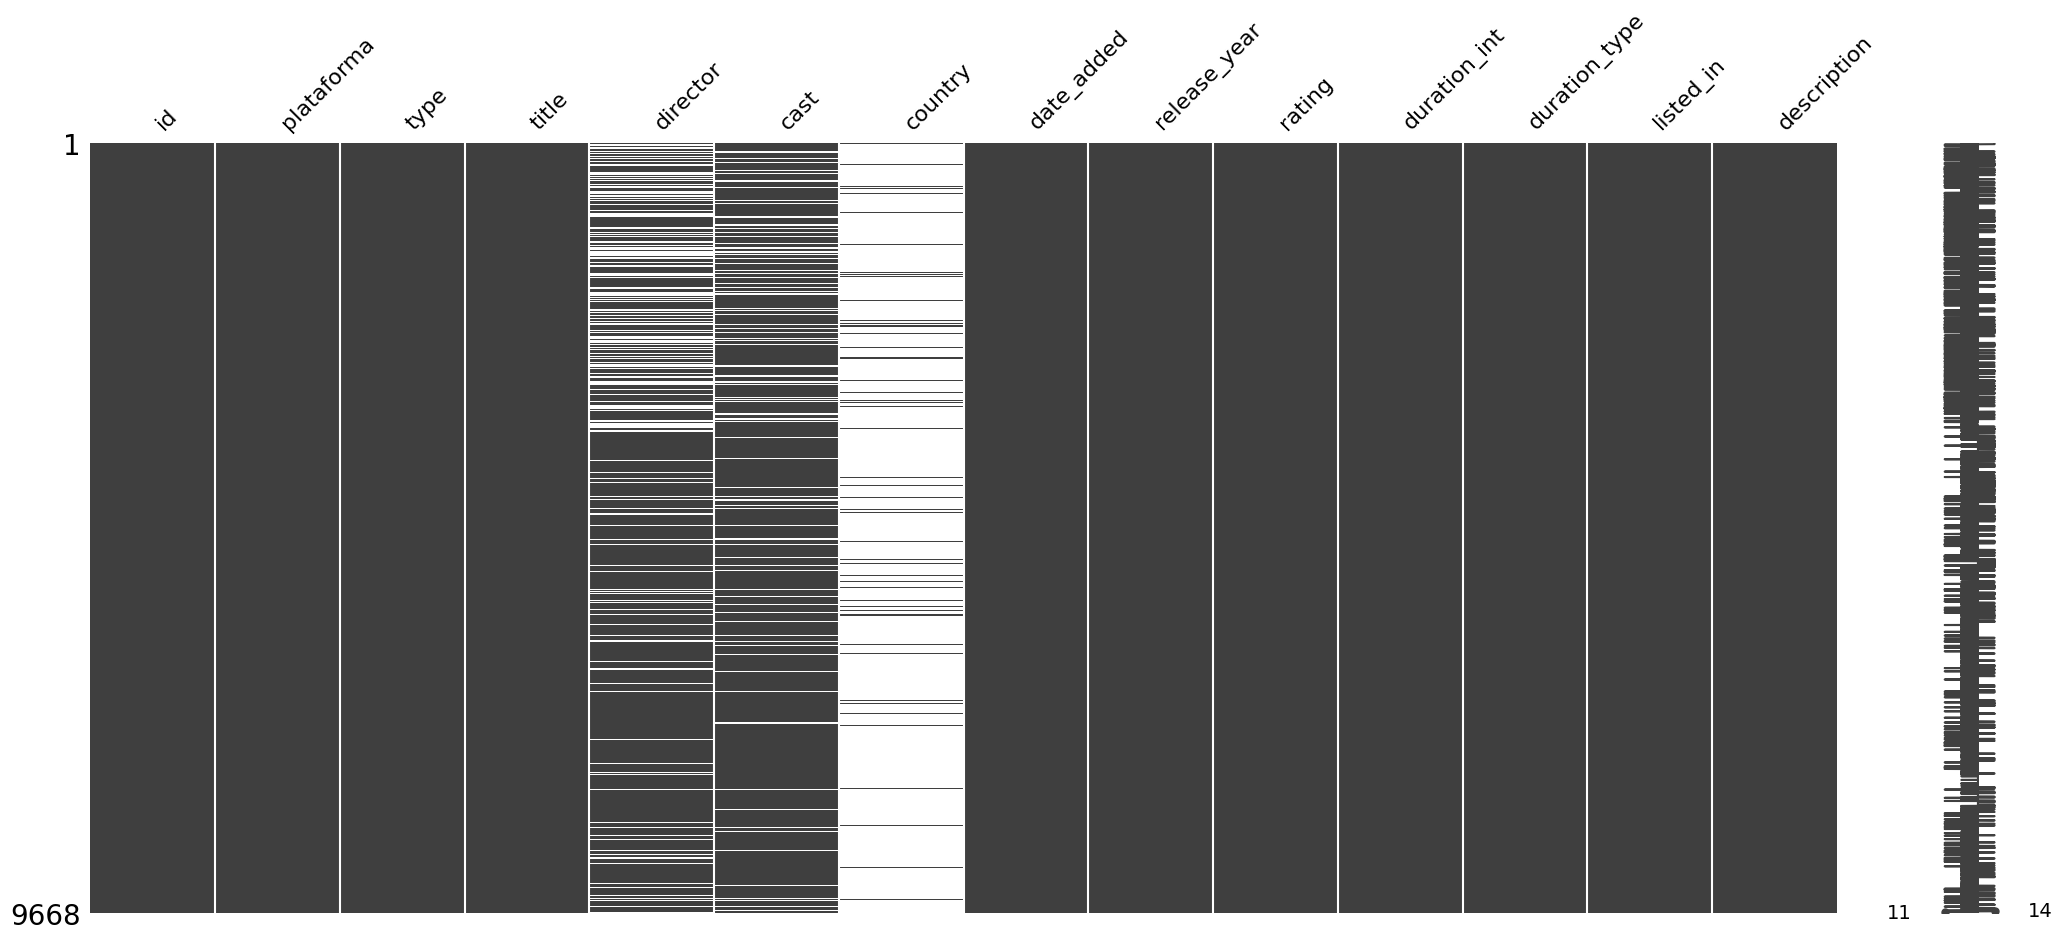

In [11]:
msno.matrix(dfaws)

# Disney Plus:


In [12]:
import pandas as pd

dfdp = pd.read_csv(r'../Datasets/movi/disney_plus_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.') # importo CSV.

dfdp = dfdp.drop_duplicates() #borro duplicates

dfdp['id'] = dfdp['show_id'].apply(lambda x: 'd' + str(x)) # agrego segun consigna la info a id column. Guardandola ahora como "id"
dfdp = dfdp.assign(plataforma='Disney Plus') #discrimino la plataforma para luego poder diferenciar en el df maestro
dfdp = dfdp.drop('show_id', axis=1) # elimino vieja columna "show_id".
dfdp = dfdp[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando la nueva columna "id" en lugar de "show_id"

dfdp['rating'] = dfdp['rating'].fillna('G') #relleno nulos de rating seguun consigna con "G"

# De haber fechas, deberán tener el formato AAAA-mm-dd...
dfdp['date_added'] = pd.to_datetime(dfdp['date_added']) # transformo a formato date
dfdp['date_added'] = dfdp['date_added'].dt.strftime('%Y-%m-%d')  #cambio el formato de las fechas reordenando

dfdp = dfdp.applymap(lambda x: x.lower() if type(x) == str else x) #Transformo todo en minusculas por simplicidad y p/ evitar futuros errores.

dfdp[['duration_int', 'duration_type']] = dfdp['duration'].str.extract('(\d+) (\D+)') # Separo columna duration en duration_int (solo minutos) y duration type (seasons)
dfdp = dfdp.drop('duration', axis=1) # elimino vieja columna "duration" ya sustituida por las anteriores
dfdp = dfdp[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int','duration_type', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando duration con duration_int y duration_type

# se observo en este dataframe valores faltantes en cast director country y date added (este ultimo será sustituido por el promedio del resto de las peliculas registradas en el csv, para minimizar la pérdida de datos)

# convierte la columna date_added a tipo datetime
dfdp['date_added'] = pd.to_datetime(dfdp['date_added'], errors='coerce')

# elige la fecha promedio y reemplaza los valores nulos en la columna date_added
date_mean = dfdp['date_added'].mean()
dfdp['date_added'].fillna(date_mean, inplace=True)

# selecciona sólo la fecha y conviértela en formato AAAA-mm-dd
dfdp['date_added'] = pd.Series(dfdp['date_added'].values).dt.strftime('%Y-%m-%d')


#completo el resto de faltantes con unknown
#dfdp.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.



In [13]:
dfdp.head(20)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,ds1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,23,min,"animation, family",join mickey and the gang as they duck the halls!
1,ds2,disney plus,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",NaN,2021-11-26,1988,pg,91,min,comedy,santa claus passes his magic bag to a new st. ...
2,ds3,disney plus,movie,ice age: a mammoth christmas,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,tv-g,23,min,"animation, comedy, family",sid the sloth is on santa's naughty list.
3,ds4,disney plus,movie,the queen family singalong,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",NaN,2021-11-26,2021,tv-pg,41,min,musical,"this is real life, not just fantasy!"
4,ds5,disney plus,tv show,the beatles: get back,NaN,"john lennon, paul mccartney, george harrison, ...",NaN,2021-11-25,2021,g,1,season,"docuseries, historical, music",a three-part documentary from peter jackson ca...
5,ds6,disney plus,movie,becoming cousteau,liz garbus,"jacques yves cousteau, vincent cassel",united states,2021-11-24,2021,pg-13,94,min,"biographical, documentary",an inside look at the legendary life of advent...
6,ds7,disney plus,tv show,hawkeye,NaN,"jeremy renner, hailee steinfeld, vera farmiga,...",NaN,2021-11-24,2021,tv-14,1,season,"action-adventure, superhero",clint barton/hawkeye must team up with skilled...
7,ds8,disney plus,tv show,port protection alaska,NaN,"gary muehlberger, mary miller, curly leach, sa...",united states,2021-11-24,2015,tv-14,2,seasons,"docuseries, reality, survival",residents of port protection must combat volat...
8,ds9,disney plus,tv show,secrets of the zoo: tampa,NaN,"dr. ray ball, dr. lauren smith, chris massaro,...",united states,2021-11-24,2019,tv-pg,2,seasons,"animals & nature, docuseries, family",a day in the life at zootampa is anything but ...
9,ds10,disney plus,movie,a muppets christmas: letters to santa,kirk r. thatcher,"steve whitmire, dave goelz, bill barretta, eri...",united states,2021-11-19,2008,g,45,min,"comedy, family, musical",celebrate the holiday season with all your fav...


<Axes: >

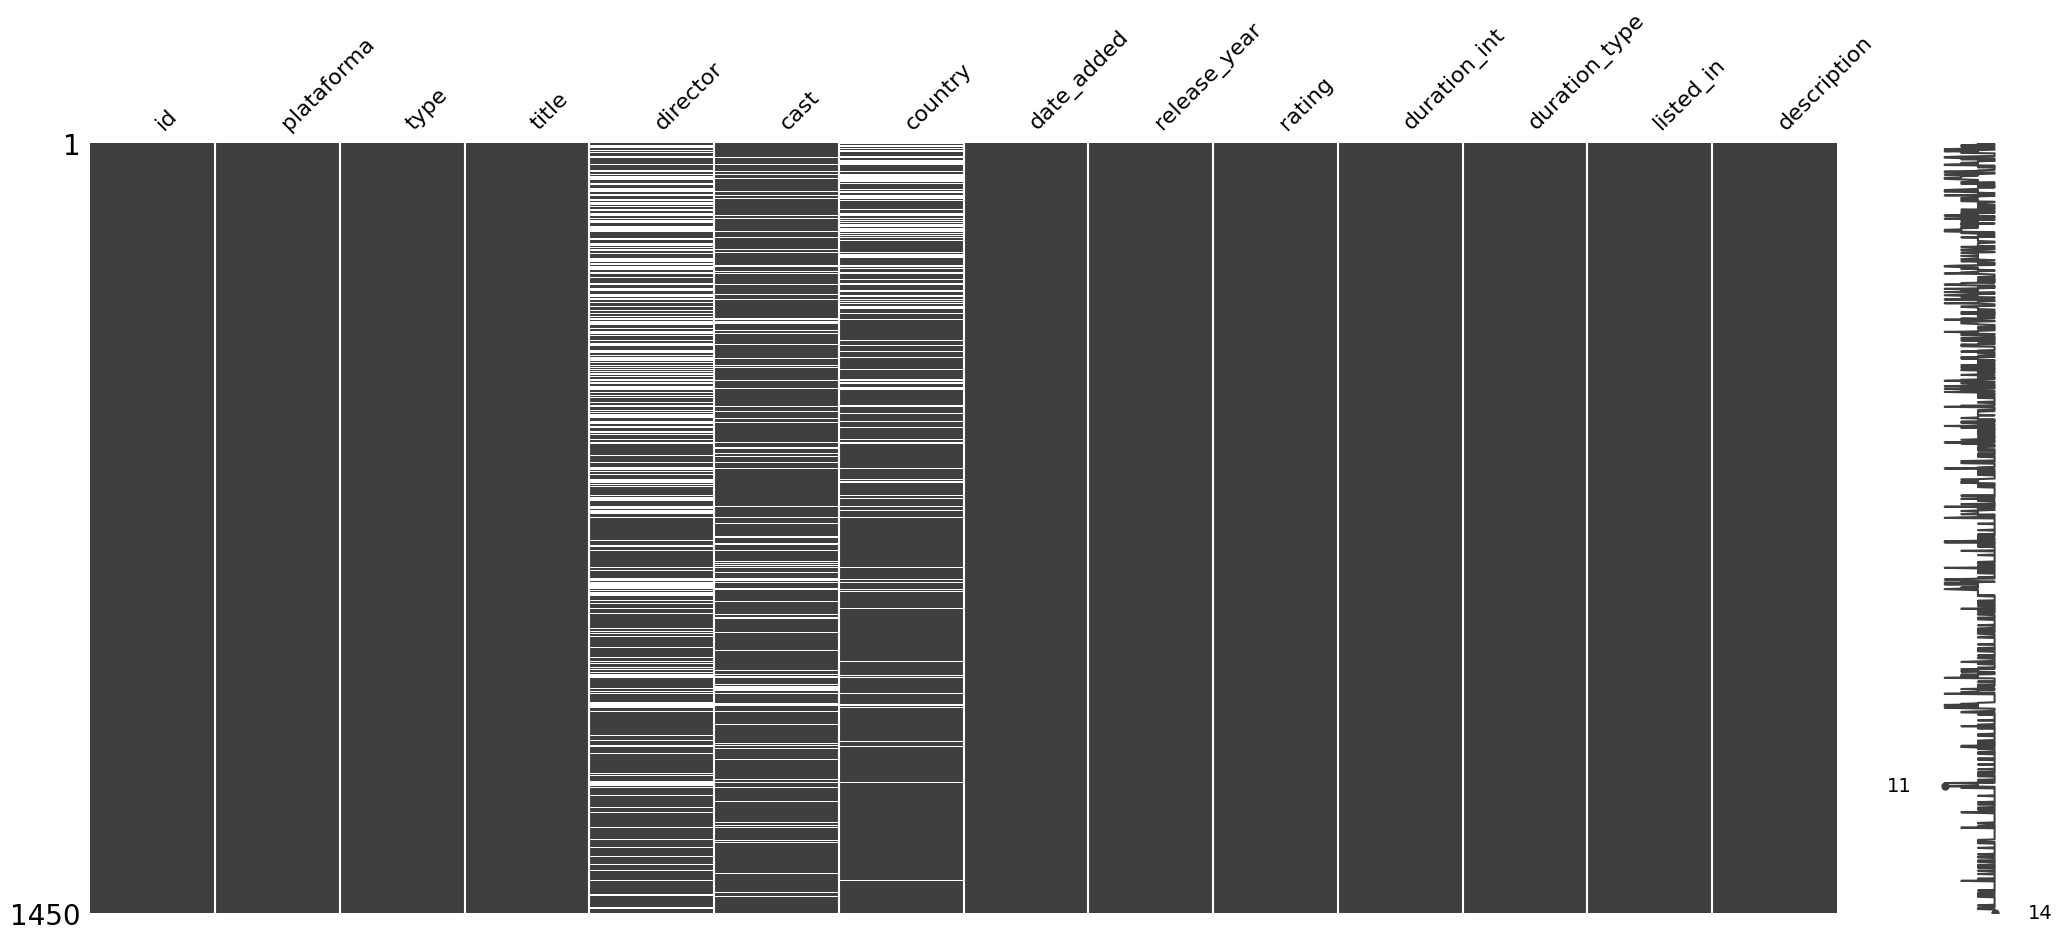

In [14]:
msno.matrix(dfdp)

# Hulu:

In [15]:
import pandas as pd # en ingles, solo para practicar.. XD

df_hulu = pd.read_csv(r'../Datasets/movi/hulu_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.') # import CSV.

df_hulu = df_hulu.drop_duplicates() # drop duplicates

df_hulu['id'] = df_hulu['show_id'].apply(lambda x: 'h' + str(x)) # add info to id column as instructed, now saved as "id"
df_hulu = df_hulu.assign(plataforma='Hulu') # discriminate platform to later differentiate in the master df
df_hulu = df_hulu.drop('show_id', axis=1) # remove old "show_id" column
df_hulu = df_hulu[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']] # reorder for convenience, replacing the new "id" column instead of "show_id"

df_hulu['rating'] = df_hulu['rating'].fillna('G') # fill in missing ratings as instructed with "G"

# If there are dates, they should have the format YYYY-mm-dd...
df_hulu['date_added'] = pd.to_datetime(df_hulu['date_added']) # convert to date format
df_hulu['date_added'] = df_hulu['date_added'].dt.strftime('%Y-%m-%d') # rearrange date format

df_hulu = df_hulu.applymap(lambda x: x.lower() if type(x) == str else x) # convert everything to lowercase for simplicity and to avoid future errors.

df_hulu[['duration_int', 'duration_type']] = df_hulu['duration'].str.extract('(\d+) (\D+)') # Separate duration column into duration_int (only minutes) and duration type (seasons)
df_hulu = df_hulu.drop('duration', axis=1) # remove old "duration" column already replaced by the previous ones
df_hulu = df_hulu[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in', 'description']] # reorder for convenience, replacing duration with duration_int and duration_type
df_hulu.isnull().sum()


# Missing values were observed in cast, director, country, and some more..  and date added columns (the latter will be replaced by the average of the rest of the movies recorded in the CSV to minimize data loss)

# Convert the date_added column to datetime type
df_hulu['date_added'] = pd.to_datetime(df_hulu['date_added'], errors='coerce')

# Choose the mean date and replace the null values in the date_added column
date_mean = df_hulu['date_added'].mean()
df_hulu['date_added'].fillna(date_mean, inplace=True)

# Select only the date and convert it to YYYY-mm-dd format
df_hulu['date_added'] = pd.Series(df_hulu['date_added'].values).dt.strftime('%Y-%m-%d')


# Choose the mean duration_int and replace the null values in the duration_int column
df_hulu['duration_int'] = df_hulu['duration_int'].astype(float)
duration_int_mean = df_hulu['duration_int'].mean()
df_hulu['duration_int'].fillna(duration_int_mean, inplace=True)



#completo el resto de faltantes con unknown
#df_hulu.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.



In [16]:
df_hulu.head(5)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,hs1,hulu,movie,ricky velez: here's everything,NaN,NaN,NaN,2021-10-24,2021,tv-ma,39.738242,NaN,"comedy, stand up",​comedian ricky velez bares it all with his ho...
1,hs2,hulu,movie,silent night,NaN,NaN,NaN,2021-10-23,2020,g,94.000000,min,"crime, drama, thriller","mark, a low end south london hitman recently r..."
2,hs3,hulu,movie,the marksman,NaN,NaN,NaN,2021-10-23,2021,pg-13,108.000000,min,"action, thriller",a hardened arizona rancher tries to protect an...
3,hs4,hulu,movie,gaia,NaN,NaN,NaN,2021-10-22,2021,r,97.000000,min,horror,a forest ranger and two survivalists with a cu...
4,hs5,hulu,movie,settlers,NaN,NaN,NaN,2021-10-22,2021,g,104.000000,min,"science fiction, thriller",mankind's earliest settlers on the martian fro...


<Axes: >

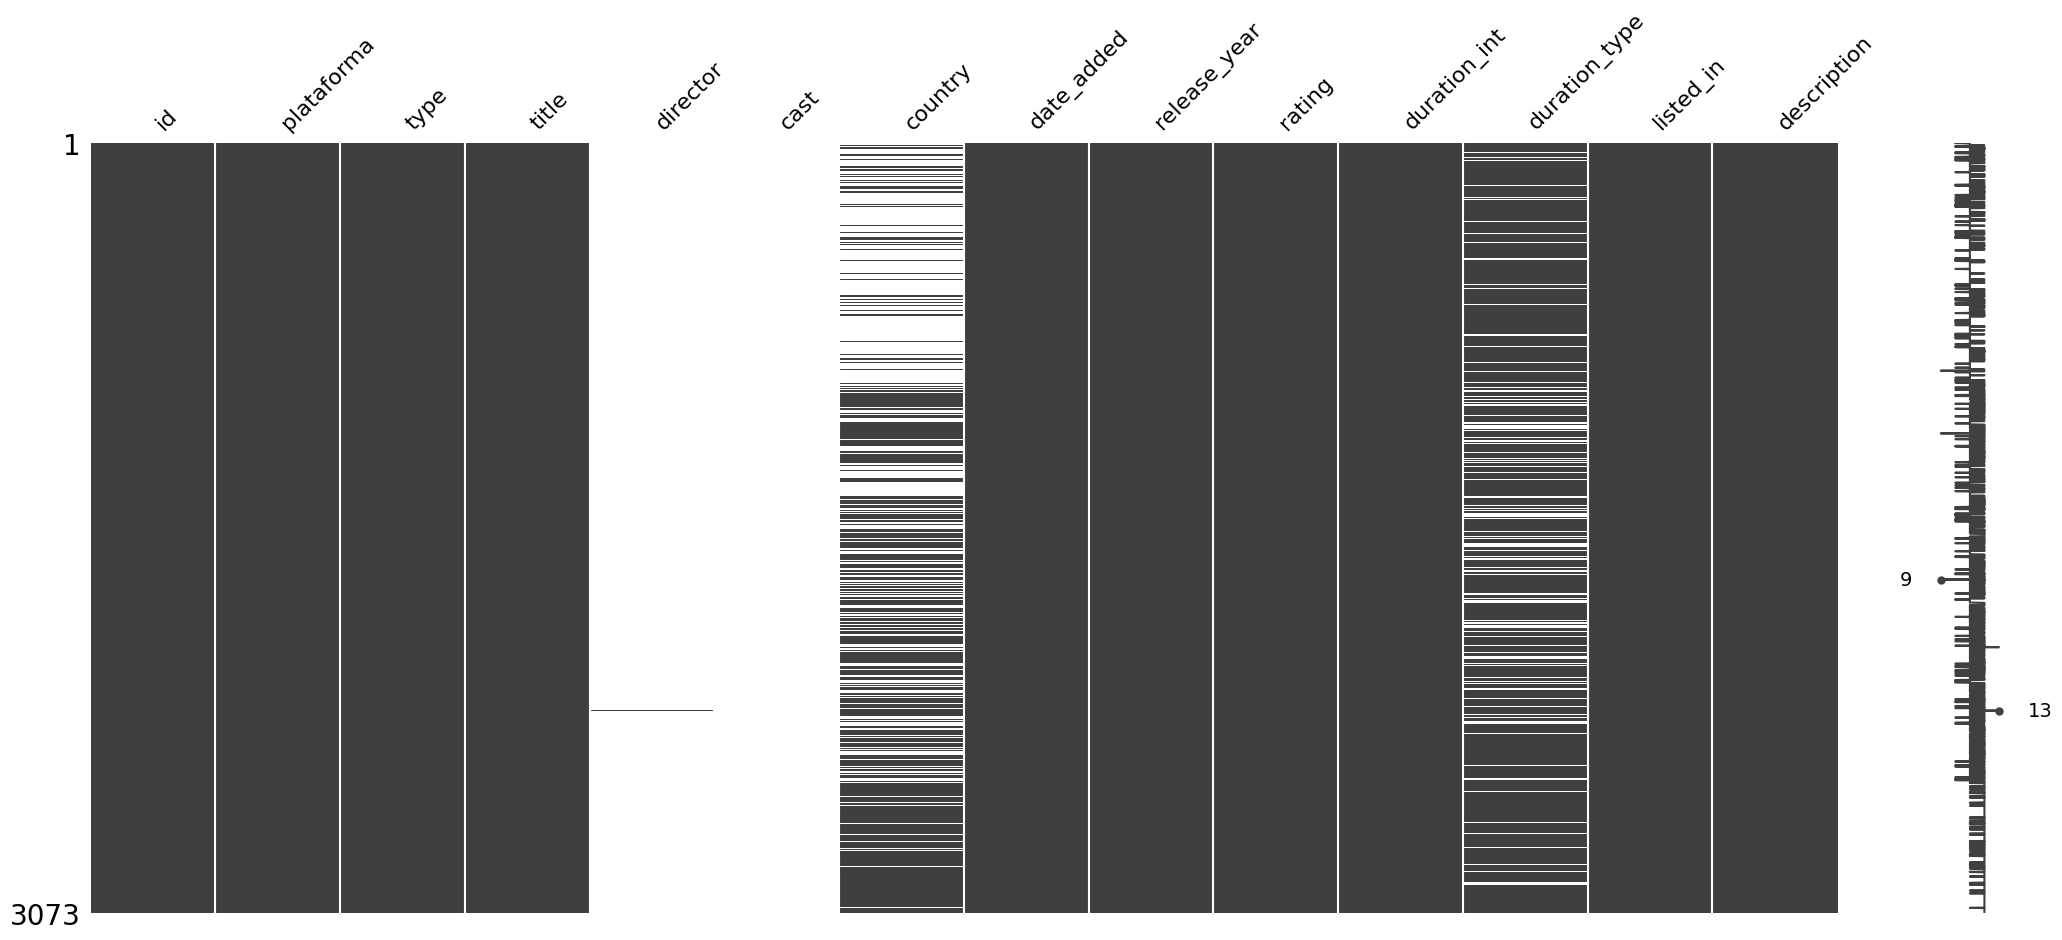

In [17]:
msno.matrix(df_hulu)

# Netflix:

In [18]:
import pandas as pd

df_netflix = pd.read_csv(r'../Datasets/movi/netflix_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.')
df_netflix = df_netflix.drop_duplicates()

df_netflix['id'] = df_netflix['show_id'].apply(lambda x: 'n' + str(x))
df_netflix = df_netflix.assign(plataforma='Netflix')
df_netflix = df_netflix.drop('show_id', axis=1)
df_netflix = df_netflix[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']]

df_netflix['rating'] = df_netflix['rating'].fillna('G')

df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
date_mean = df_netflix['date_added'].mean()
df_netflix['date_added'].fillna(date_mean, inplace=True)
df_netflix['date_added'] = df_netflix['date_added'].dt.strftime('%Y-%m-%d')

df_netflix = df_netflix.applymap(lambda x: x.lower() if type(x) == str else x)
df_netflix[['duration_int', 'duration_type']] = df_netflix['duration'].str.extract('(\d+) (\D+)')
df_netflix = df_netflix.drop('duration', axis=1)
df_netflix = df_netflix[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in', 'description']]
df_netflix.isnull().sum()

# Convert duration_int column to float
df_netflix['duration_int'] = df_netflix['duration_int'].astype(float)

# Fill missing values with mean duration_int
duration_int_mean = df_netflix['duration_int'].mean()
df_netflix['duration_int'].fillna(duration_int_mean, inplace=True)



In [19]:
df_netflix.head(10)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,ns1,netflix,movie,dick johnson is dead,kirsten johnson,NaN,united states,2021-09-25,2020,pg-13,90.0,min,documentaries,"as her father nears the end of his life, filmm..."
1,ns2,netflix,tv show,blood & water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,2.0,seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,ns3,netflix,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",NaN,2021-09-24,2021,tv-ma,1.0,season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,ns4,netflix,tv show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,tv-ma,1.0,season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,ns5,netflix,tv show,kota factory,NaN,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,2.0,seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...
5,ns6,netflix,tv show,midnight mass,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",NaN,2021-09-24,2021,tv-ma,1.0,season,"tv dramas, tv horror, tv mysteries",the arrival of a charismatic young priest brin...
6,ns7,netflix,movie,my little pony: a new generation,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",NaN,2021-09-24,2021,pg,91.0,min,children & family movies,equestria's divided. but a bright-eyed hero be...
7,ns8,netflix,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,tv-ma,125.0,min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s..."
8,ns9,netflix,tv show,the great british baking show,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,2021-09-24,2021,tv-14,9.0,seasons,"british tv shows, reality tv",a talented batch of amateur bakers face off in...
9,ns10,netflix,movie,the starling,theodore melfi,"melissa mccarthy, chris o'dowd, kevin kline, t...",united states,2021-09-24,2021,pg-13,104.0,min,"comedies, dramas",a woman adjusting to life after a loss contend...


<Axes: >

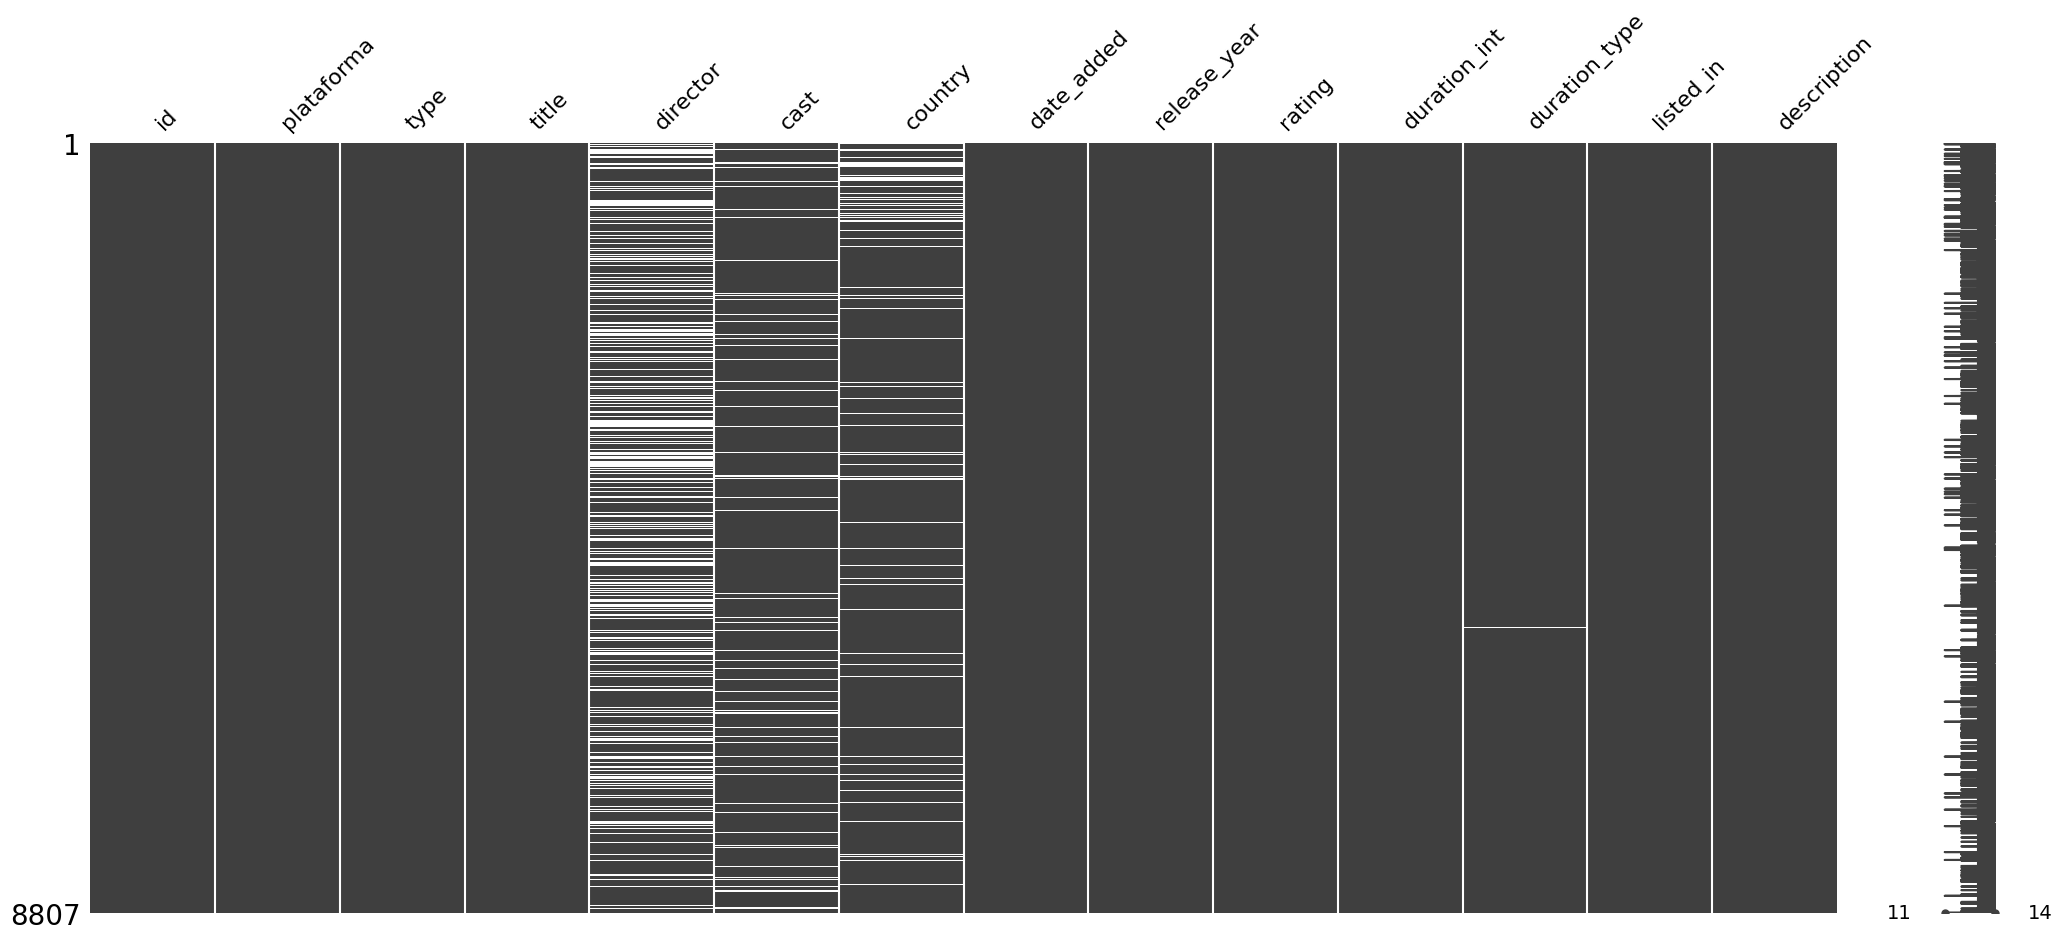

In [20]:
msno.matrix(df_netflix)

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# df_movies: El concatenado.

In [21]:
# Crea una lista con todos los dataframes
dataframes = [dfaws, dfdp, df_hulu, df_netflix]

# Concatena los dataframes en uno solo
df_movies = pd.concat(dataframes)

# Si deseas restablecer los índices del dataframe concatenado
df_movies.reset_index(drop=True, inplace=True)

# Muestra el dataframe concatenado
df_movies

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,ns8803,netflix,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,158.0,min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
22994,ns8804,netflix,tv show,zombie dumb,NaN,NaN,NaN,2019-07-01,2018,tv-y7,2.0,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
22995,ns8805,netflix,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,88.0,min,"comedies, horror movies",looking to survive in a world taken over by zo...
22996,ns8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,88.0,min,"children & family movies, comedies","dragged from civilian life, a former superhero..."


In [22]:
df_movies = df_movies.fillna('unknown')

In [23]:

#completo el resto de faltantes con unknown
#df_movies.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.

# transformación de todos los tipos de datos presentes en el df
df_movies['id'] = df_movies['id'].astype('object')
df_movies['plataforma'] = df_movies['plataforma'].astype('category')
df_movies['type'] = df_movies['type'].astype('category')
df_movies['title'] = df_movies['title'].astype('object')
df_movies['director'] = df_movies['director'].astype('object')
df_movies['cast'] = df_movies['cast'].astype('object')
df_movies['country'] = df_movies['country'].astype('object')
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])
df_movies['release_year'] = df_movies['release_year'].astype('int64')
df_movies['rating'] = df_movies['rating'].astype('category')
df_movies['duration_int'] = df_movies['duration_int'].astype('int64')
df_movies['duration_type'] = df_movies['duration_type'].astype('object')
df_movies['listed_in'] = df_movies['listed_in'].astype('category')
df_movies['description'] = df_movies['description'].astype('object')


In [24]:
# Renombrar el campo "id" a "movieId"
df_movies.rename(columns={'id': 'movieId'}, inplace=True)

<Axes: >

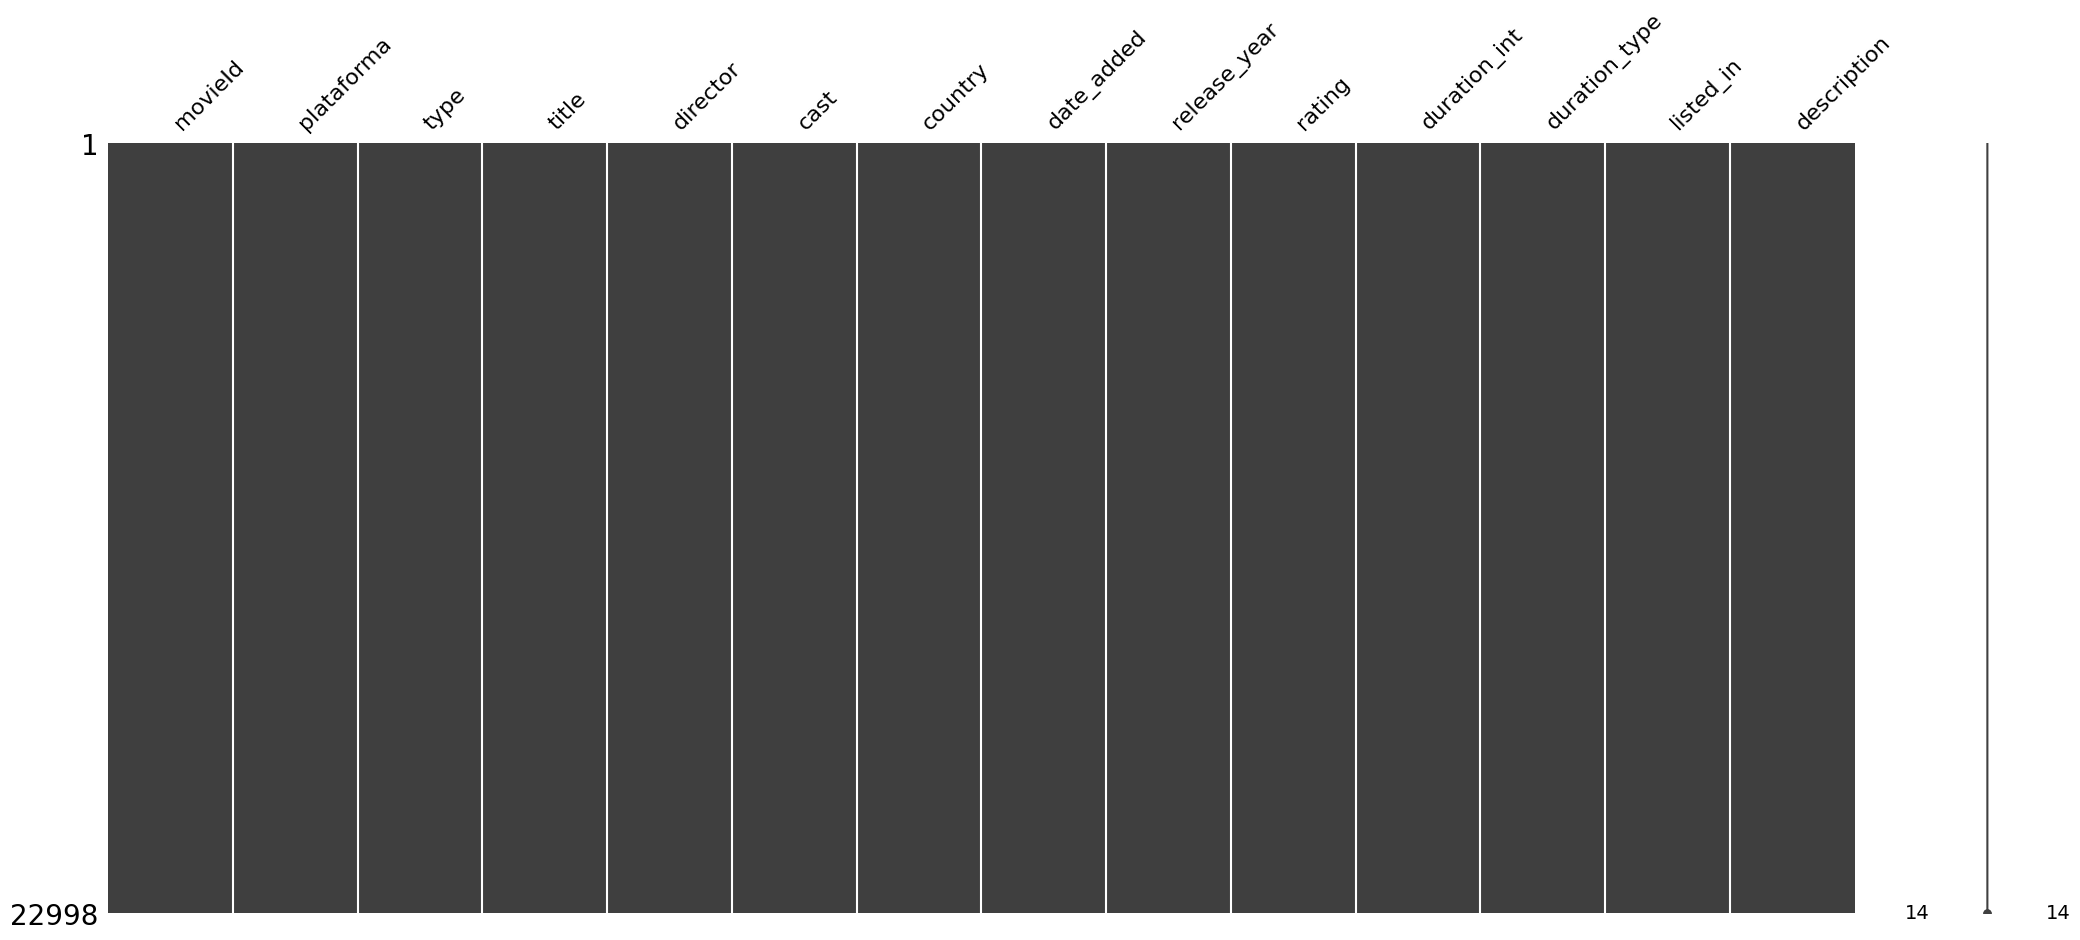

In [25]:
msno.matrix(df_movies)

In [26]:
df_movies.isnull().sum()

movieId          0
plataforma       0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration_int     0
duration_type    0
listed_in        0
description      0
dtype: int64

In [27]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   movieId        22998 non-null  object        
 1   plataforma     22998 non-null  category      
 2   type           22998 non-null  category      
 3   title          22998 non-null  object        
 4   director       22998 non-null  object        
 5   cast           22998 non-null  object        
 6   country        22998 non-null  object        
 7   date_added     22998 non-null  datetime64[ns]
 8   release_year   22998 non-null  int64         
 9   rating         22998 non-null  category      
 10  duration_int   22998 non-null  int64         
 11  duration_type  22998 non-null  object        
 12  listed_in      22998 non-null  category      
 13  description    22998 non-null  object        
dtypes: category(4), datetime64[ns](1), int64(2), object(7)
memory usage: 1

In [28]:
df_movies.describe(exclude=None)

,date_added,release_year,duration_int
count,22998,22998.000000,22998.000000
mean,2020-05-30 20:09:27.284111616,2010.811244,66.531872
min,2006-07-14 00:00:00,1920.000000,0.000000
25%,2019-09-28 06:00:00,2010.000000,4.000000
50%,2021-05-07 00:00:00,2016.000000,83.000000
75%,2021-07-14 00:00:00,2019.000000,101.000000
max,2021-11-26 00:00:00,2021.000000,601.000000
std,NaN,15.401142,51.018381


In [29]:
plataforma_counts = df_movies['plataforma'].value_counts()
type_counts = df_movies['type'].value_counts()
rating_counts = df_movies['rating'].value_counts()
duration_type_counts = df_movies['duration_type'].value_counts()
date_added_counts = df_movies['date_added'].value_counts()
release_year_counts = df_movies['release_year'].value_counts()
duration_int_counts = df_movies['duration_int'].value_counts()
listed_in_counts = df_movies['listed_in'].value_counts()

In [30]:
plataforma_counts.head(50)

plataforma
aws            9668
netflix        8807
hulu           3073
disney plus    1450
Name: count, dtype: int64

In [31]:
type_counts.head(50)

type
movie      16481
tv show     6517
Name: count, dtype: int64

In [32]:
rating_counts.head(50) # hay algunos datos que se han desplazado de columna, luego vere que hacer con ellos


rating
tv-ma        3675
tv-14        3138
r            2154
13+          2117
tv-pg        1654
16+          1547
g            1269
all          1268
18+          1243
pg-13        1112
pg            881
tv-g          767
tv-y7         550
tv-y          462
7+            385
nr            304
tv-nr         105
1 season       42
unrated        33
tv-y7-fv       19
89 min         11
90 min          9
2 seasons       9
80 min          9
91 min          9
85 min          8
99 min          8
94 min          8
88 min          8
93 min          7
96 min          7
101 min         7
98 min          7
87 min          6
78 min          6
92 min          6
97 min          6
nc-17           6
104 min         6
3 seasons       5
95 min          5
86 min          5
84 min          5
82 min          5
109 min         5
7 min           4
6 seasons       4
ages_18_        3
81 min          3
76 min          3
Name: count, dtype: int64

In [33]:
import pandas as pd
import numpy as np

# Verificar si una cadena contiene las palabras "min", "season" o "seasons"
def contains_inappropriate_values(value):
    inappropriate_words = ['min', 'season', 'seasons']
    for word in inappropriate_words:
        if word in str(value):
            return True
    return False

# Reemplazar los valores inapropiados con NaN
df_movies['rating'] = df_movies['rating'].apply(lambda x: "unknown" if contains_inappropriate_values(x) else x)




In [34]:
rating_counts = df_movies['rating'].value_counts()

In [35]:
rating_counts.head(50)

rating
tv-ma        3675
tv-14        3138
r            2154
13+          2117
tv-pg        1654
16+          1547
g            1269
all          1268
18+          1243
pg-13        1112
pg            881
tv-g          767
tv-y7         550
tv-y          462
7+            385
nr            304
unknown       295
tv-nr         105
unrated        33
tv-y7-fv       19
nc-17           6
not_rate        3
ur              3
ages_18_        3
ages_16_        2
all_ages        1
not rated       1
16              1
Name: count, dtype: int64

In [36]:
duration_type_counts.head(50)

duration_type
min        15999
season      4183
seasons     2334
unknown      482
Name: count, dtype: int64

In [37]:
date_added_counts.head(50)

date_added
2021-07-14    9525
2019-11-12     724
2020-01-01     145
2021-07-01     132
2021-09-01     107
2019-12-31     105
2019-05-23     101
2021-10-01      99
2019-11-01      98
2018-10-01      97
2021-08-01      79
2019-10-01      79
2018-03-01      75
2021-01-01      72
2020-11-01      63
2020-04-01      63
2018-11-01      63
2017-09-05      62
2021-04-01      62
2020-10-01      58
2021-05-01      56
2020-05-01      55
2018-01-01      54
2019-07-01      54
2021-06-02      53
2018-04-01      49
2017-10-01      49
2020-07-01      44
2017-07-01      43
2019-01-01      43
2018-07-01      43
2020-06-01      42
2018-05-01      42
2021-08-27      41
2020-01-31      41
2021-09-15      41
2017-08-01      41
2020-08-01      40
2019-02-01      40
2021-07-06      40
2017-09-01      40
2020-12-01      39
2019-12-01      38
2018-08-01      37
2020-09-01      34
2016-01-01      34
2020-04-03      33
2018-12-01      33
2019-10-31      33
2021-07-15      32
Name: count, dtype: int64

In [38]:
duration_int_counts.head(50)

duration_int
1      4194
2      1016
39      491
3       487
90      429
91      419
94      384
92      375
93      372
88      350
89      347
95      340
97      324
87      306
96      303
4       299
86      295
99      288
98      286
100     260
102     256
101     253
103     243
85      241
105     237
106     237
104     228
5       222
84      213
83      212
107     195
110     187
81      183
82      179
109     178
108     176
80      167
111     153
112     150
6       147
113     145
7       137
116     136
120     135
118     129
60      126
114     125
78      124
79      124
119     116
Name: count, dtype: int64

In [39]:
listed_in_counts.head(50)

listed_in
drama                                                         1061
comedy                                                         608
documentaries                                                  573
comedy, drama                                                  421
drama, suspense                                                399
documentary                                                    375
animation, kids                                                373
kids                                                           367
dramas, international movies                                   362
stand-up comedy                                                334
horror                                                         305
action, drama                                                  303
documentary, special interest                                  296
tv shows                                                       279
comedies, dramas, international movies              

In [40]:

import os

# Ruta del archivo pickle
pickle_file = '../Datasets/Datasets_cleaned_ETL/movi_cleaned/df_movies.pkl'

# Verificar si el archivo existe
if os.path.exists(pickle_file):
    # Eliminar el archivo existente
    os.remove(pickle_file)

# Guardar el dataframe como archivo pickle
df_movies.to_pickle(pickle_file)
